# LGM_Internship

## Task 3 : Music Recommendation System
### - by Siddharth Gala

### Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file

In [ ]:
train = pd.read_csv('train.csv') #train data
song= pd.read_csv('songs.csv') #song data
members = pd.read_csv('members.csv') #members data

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
song.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


### Exploratory Data Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211170 entries, 0 to 211169
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                211170 non-null  object 
 1   song_id             211169 non-null  object 
 2   source_system_tab   210579 non-null  object 
 3   source_screen_name  201276 non-null  object 
 4   source_type         210799 non-null  object 
 5   target              211169 non-null  float64
dtypes: float64(1), object(5)
memory usage: 9.7+ MB


In [ ]:
song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287182 entries, 0 to 287181
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   song_id      287182 non-null  object 
 1   song_length  287182 non-null  int64  
 2   genre_ids    280425 non-null  object 
 3   artist_name  287181 non-null  object 
 4   composer     162480 non-null  object 
 5   lyricist     68336 non-null   object 
 6   language     287181 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 15.3+ MB


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
train.describe ()

,target
count,211169.000000
mean,0.745872
std,0.435371
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
song.describe ()

,song_length,language
count,2.871820e+05,287181.000000
mean,2.476698e+05,28.225830
std,1.443923e+05,23.670419
min,3.000000e+00,-1.000000
25%,1.961790e+05,3.000000
50%,2.322915e+05,31.000000
75%,2.741810e+05,52.000000
max,9.146340e+06,59.000000


In [ ]:
members.describe ()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
train.shape

(211170, 6)

In [ ]:
song.shape

(287182, 7)

In [ ]:
members.shape

(34403, 7)

<Axes: xlabel='source_system_tab', ylabel='count'>

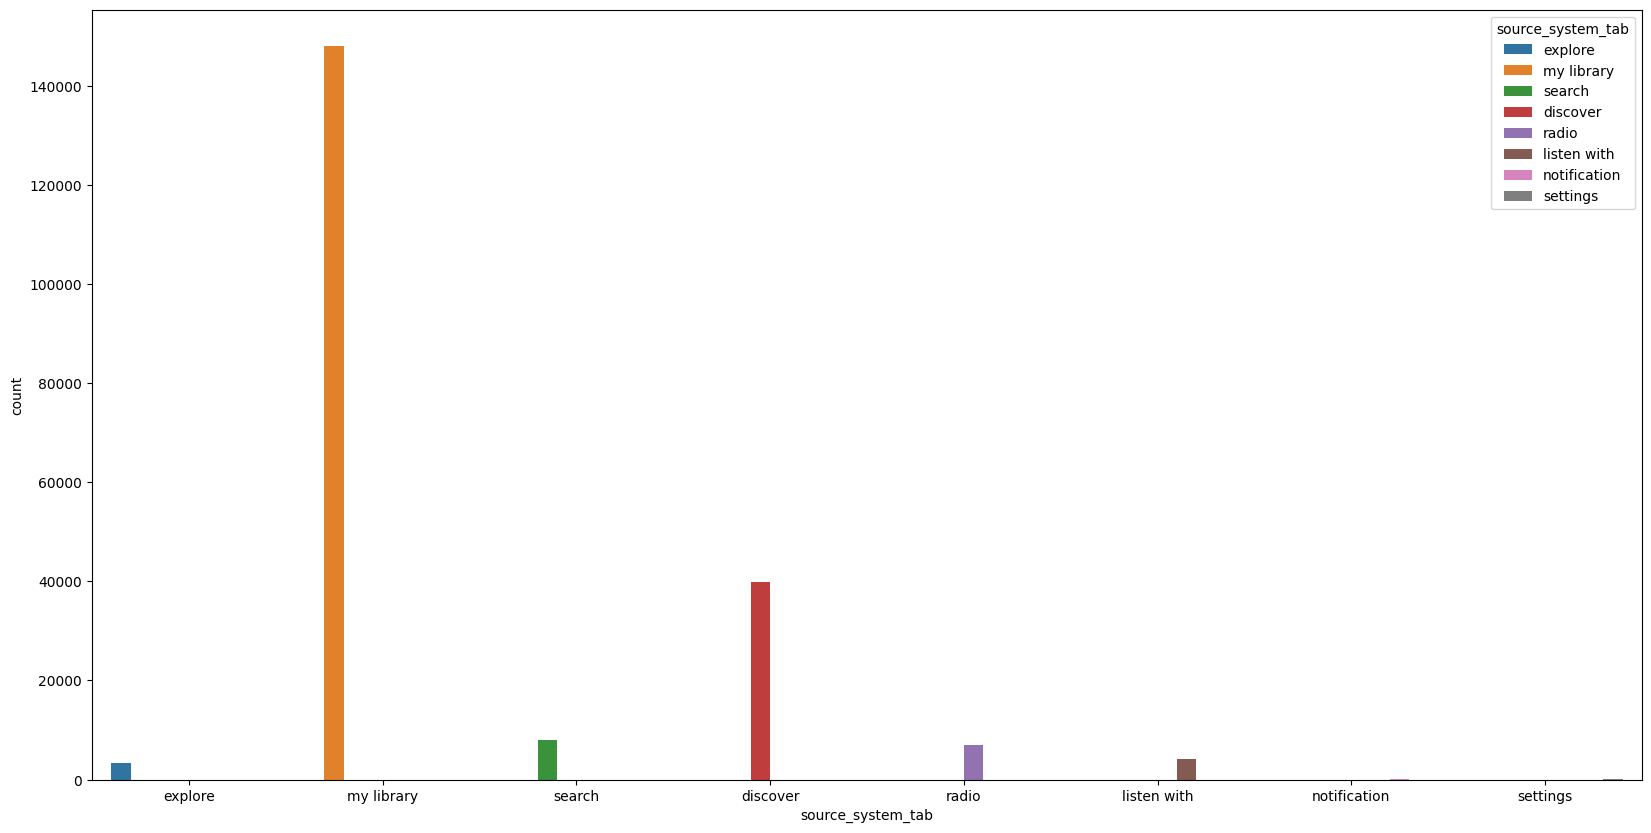

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab',hue='source_system_tab',data=train)

<Axes: xlabel='source_system_tab', ylabel='count'>

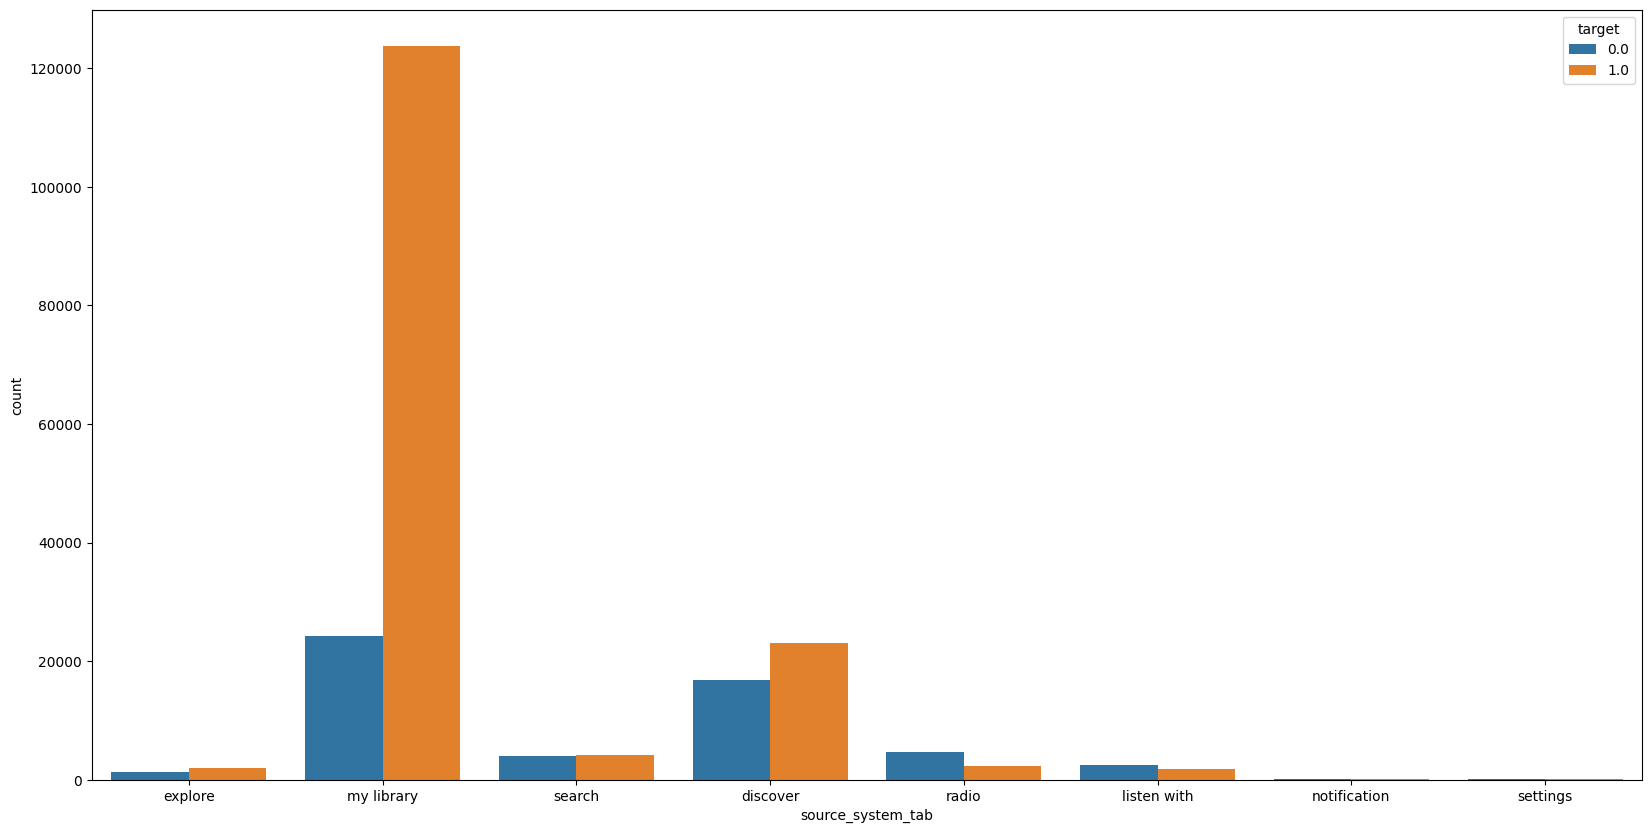

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab',hue='target',data=train)

<Axes: xlabel='source_screen_name', ylabel='count'>

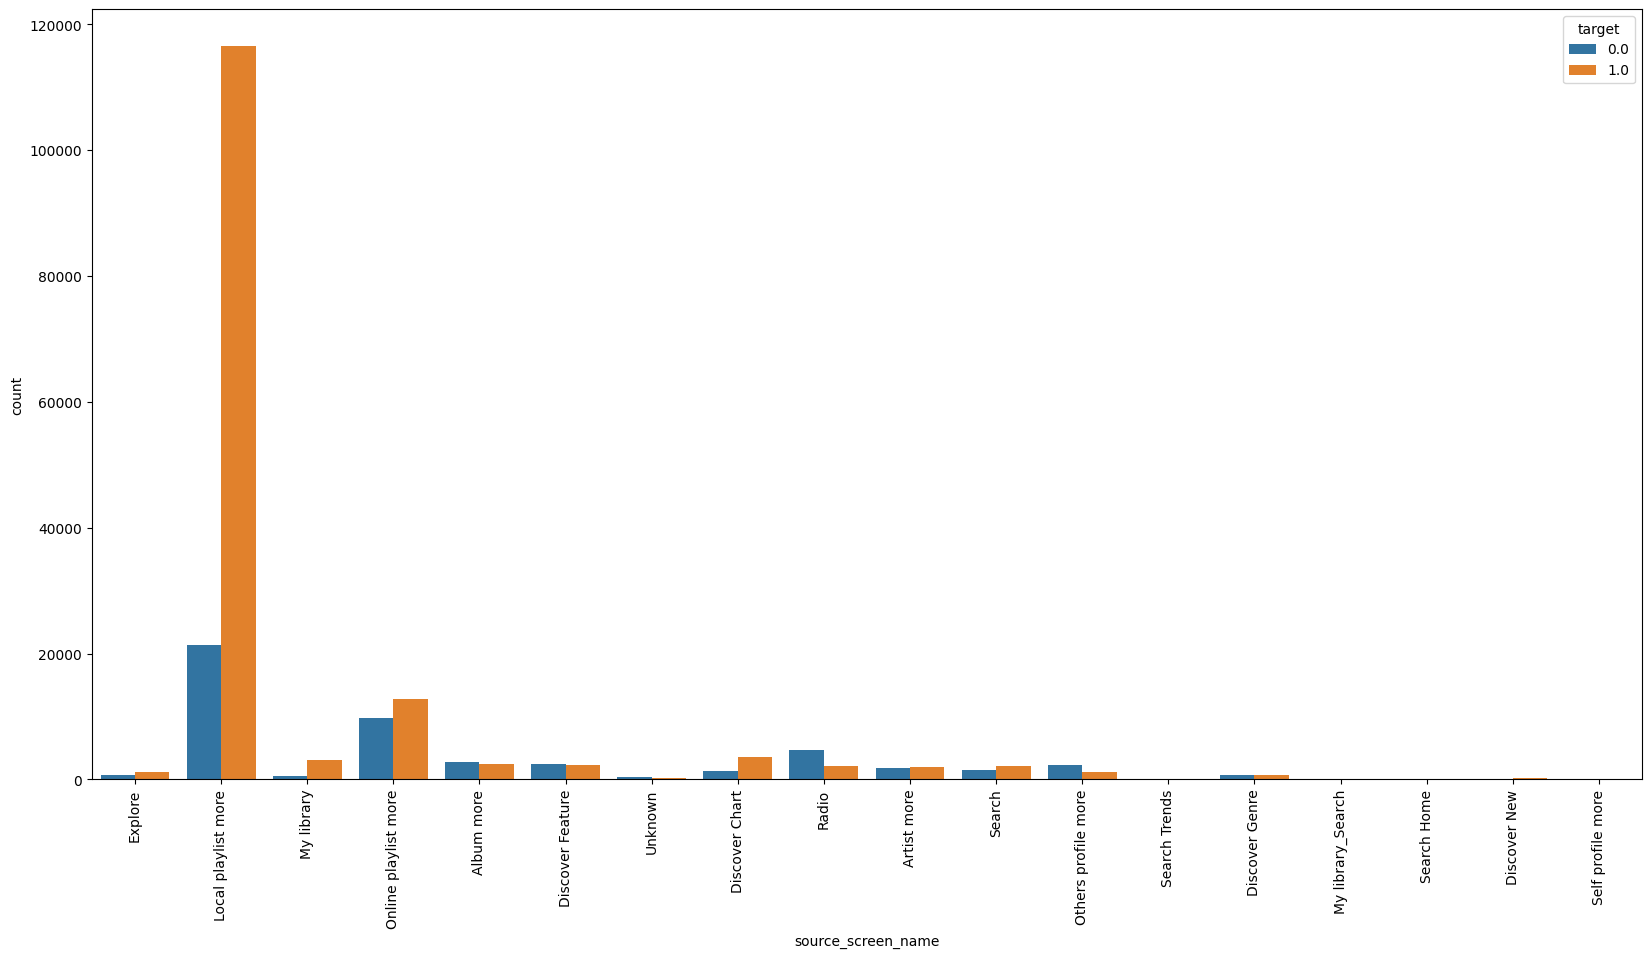

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name',hue='target',data=train)

<Axes: xlabel='source_type', ylabel='count'>

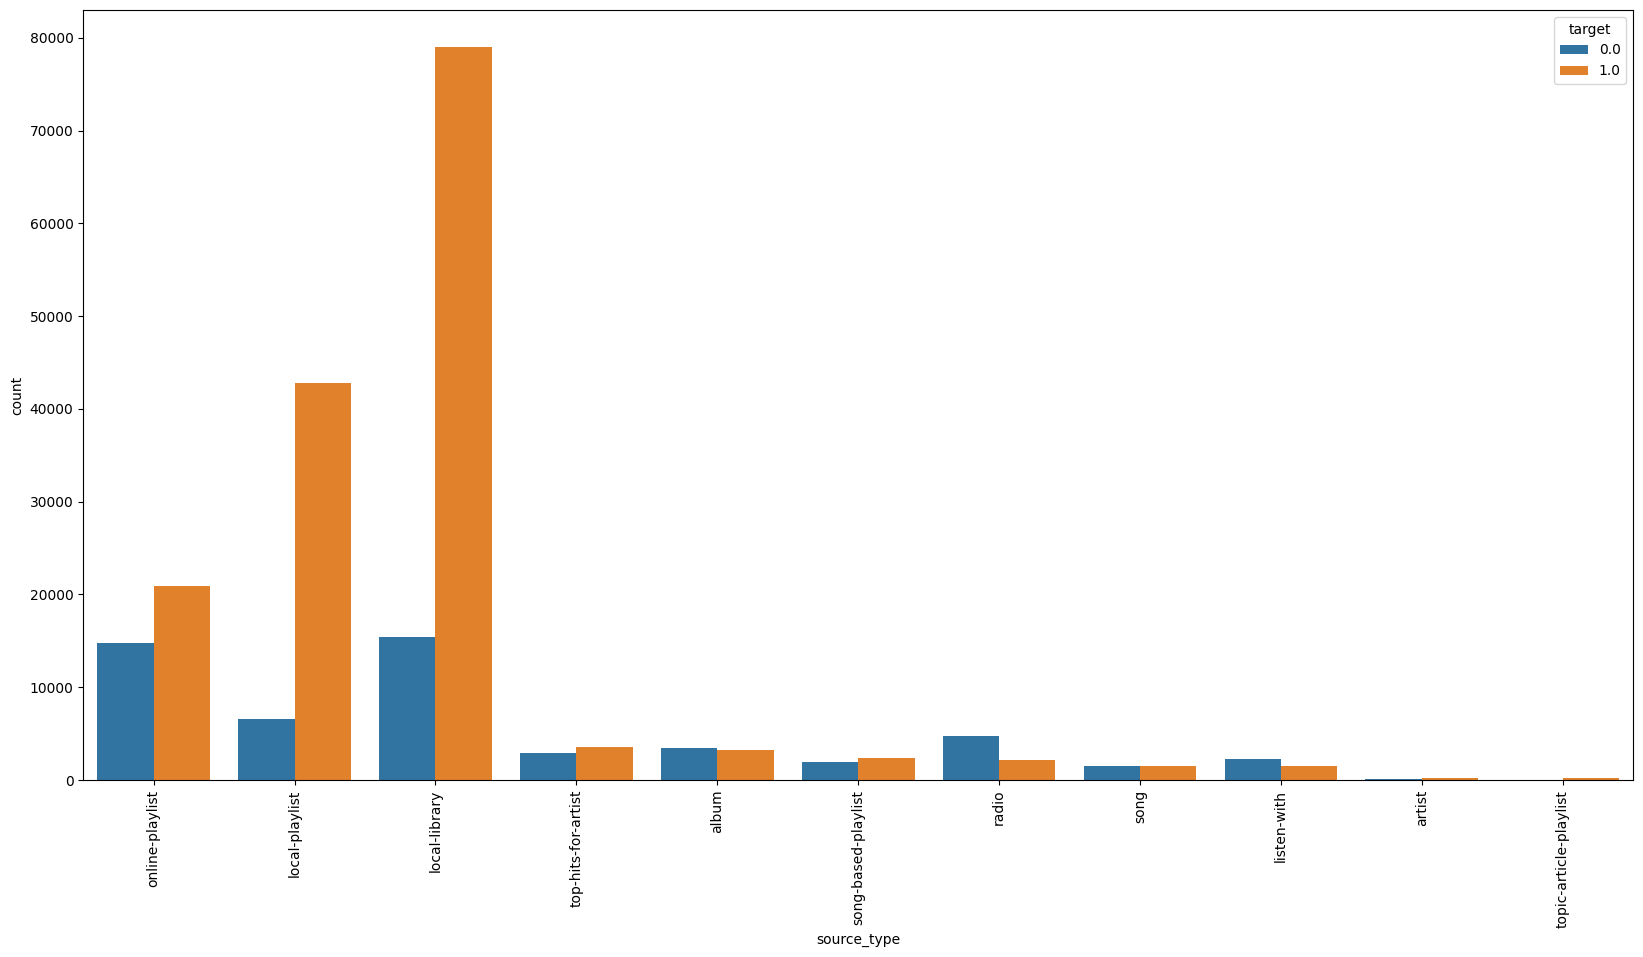

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x ='source_type', hue='target' ,data=train)

<Axes: xlabel='language', ylabel='count'>

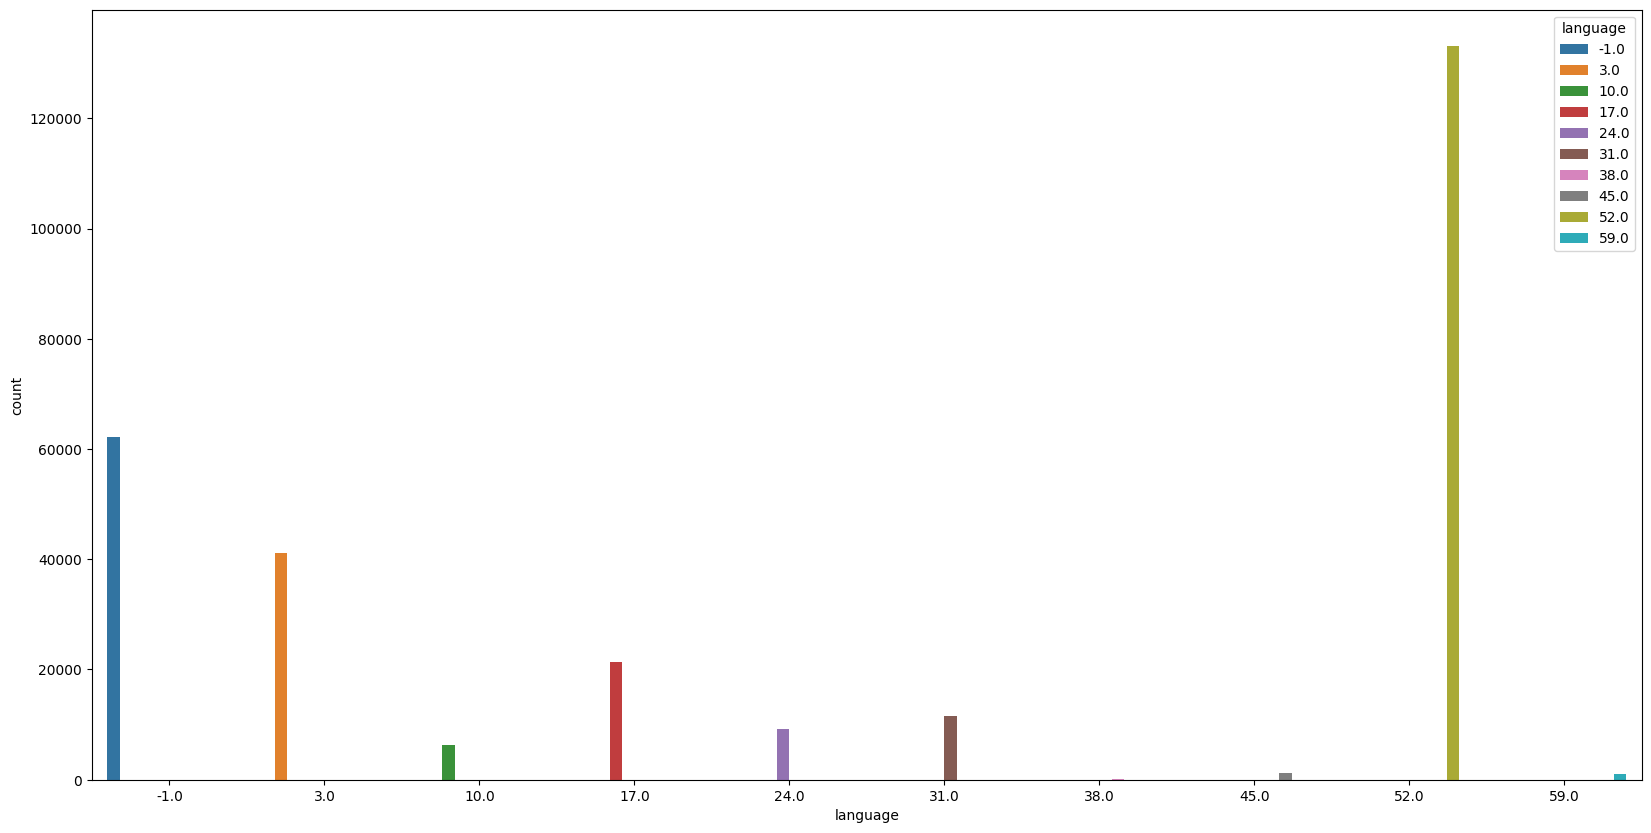

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='language',hue='language',data=song)

<Axes: xlabel='registered_via', ylabel='count'>

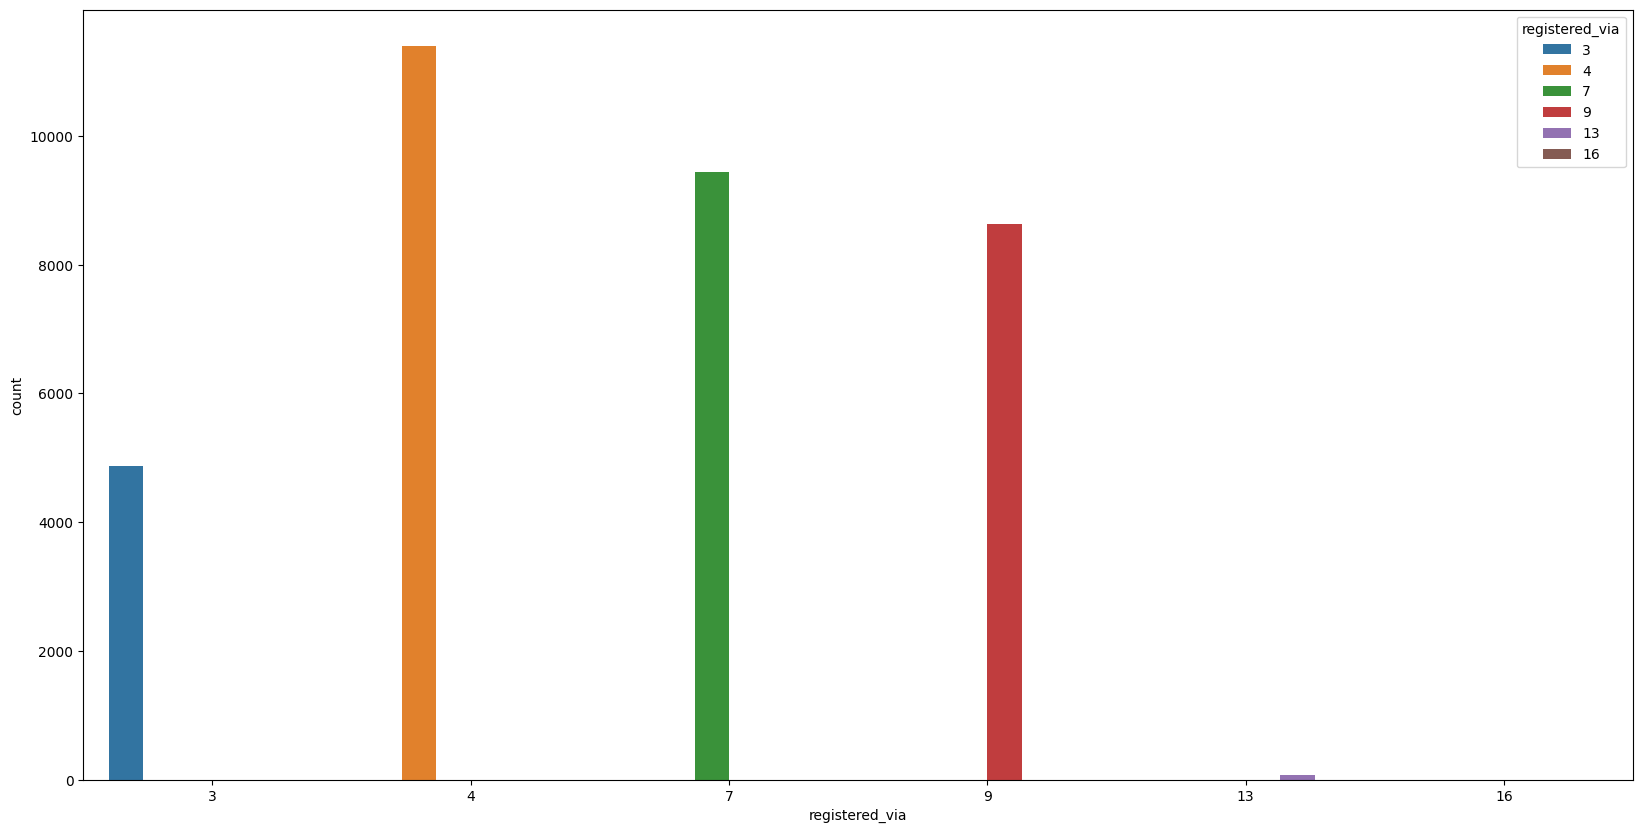

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='registered_via',hue='registered_via',data=members)

In [ ]:
ntr = 7000
nts = 3000
names=['msno', 'song_id', 'source_system_tab', 'source_screen_name' , 'source_type', 'target']
test1 = pd.read_csv('train.csv',names=names, skiprows=ntr,nrows=nts)

In [ ]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [ ]:
test_name = ['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [ ]:
song_cols = ['song_id', 'artist_name', 'genre_ids','song_length', 'language']
train = train.merge (song [song_cols], on='song_id', how='left')
test = test.merge(song [song_cols], on='song_id', how='left')

In [ ]:
members ['registration year'] = members['registration_init_time'].apply (lambda x: int(str(x)[0:4]))
members ['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members ['registration date' ] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [ ]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]) if str(x)[0:4].strip() else 0)
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]) if str(x)[4:6].strip() else 0)
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]) if str(x)[6:8].strip() else 0)
members = members.drop(['registration_init_time'], axis=1)

In [ ]:
members_cols = members. columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [ ]:
train = train.fillna(-1)
test = test.fillna(-1)

In [ ]:
import gc
del members, song; gc.collect();

In [ ]:
cols = list(train.columns)
cols.remove('target')

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test [col] = test [col].apply(str)

        le = LabelEncoder ()
        train_vals = list(train[col].unique ())
        test_vals = list(test[col].unique ())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:02<00:00,  8.63it/s]


In [ ]:
unique_songs = range(max(train['song_id'].max(), test ['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs,'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values ('song_id')
test_sorted.reset_index(drop=True,inplace=True)

###  Splitting of dataset into training & testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)

del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid)

watchlist = [d_train, d_valid]

In [ ]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr) .astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

### Model Building

In [ ]:
from sklearn. linear_model import LogisticRegression

In [ ]:
predict(LogisticRegression ())

Training Score: 0.745770916533809
Accuracy on test data for the model 74.9


In [ ]:
params = {}
params ['learning_rate'] = 0.4
params ['application'] = 'binary'
params ['max_depth'] = 15
params ['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist,early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 10 rounds
[10]	training's auc: 0.87308	valid_1's auc: 0.850022
[20]	training's auc: 0.901044	valid_1's auc: 0.863916
[30]	training's auc: 0.918474	valid_1's auc: 0.870852
[40]	training's auc: 0.932147	valid_1's auc: 0.873558
Early stopping, best iteration is:
[38]	training's auc: 0.930201	valid_1's auc: 0.874199


### Accuracy testing

In [ ]:
p_test = model1.predict(X_test)

In [ ]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum () /comp.size*100
print('The accuracy of lgbm model on test data is: {0:1}%'.format(acc))

The accuracy of lgbm model on test data is: 87.73333333333333%
